# Pytorch DNN

In [ ]:
# !pip install torch

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 간단한 인공 신경망
# FC(Fully Connected Layer)
# Activation: ReLu
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1, bias=False)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [3]:
# 데이터 생성 함수 (정답 데이터)
def true_fun(s):
    noise = np.random.rand(s.shape[0]) * 0.4 - 0.2
    return np.cos(1.5 * np.pi * s) + s + noise

In [4]:
# 입력 상태와 밸류
s = np.linspace(0, 5, 101)
v = true_fun(s)

In [5]:
# 모델 및 optimizer 초기화
model = Model()
optimizer = optim.Adam(model.parameters(), lr=0.001)

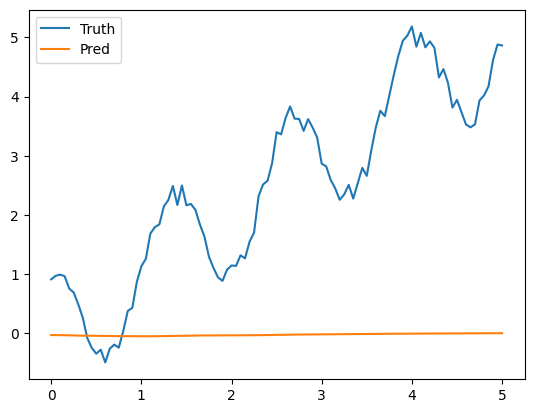

In [6]:
# 학습되지 않은 상태에서 추론값 확인
inputs = torch.from_numpy(s).float().reshape(-1, 1)
with torch.no_grad():
    pred = model(inputs).detach().numpy()

plt.plot(s, v, label="Truth")
plt.plot(s, pred.reshape(-1), label="Pred")
plt.legend()
plt.show()

In [7]:
# 10,000회 합습
for step in range(10000):
    # 입력 및 정답
    inputs = torch.from_numpy(s).float().reshape(-1, 1)
    label = torch.from_numpy(v).float().reshape(-1, 1)
    # 추론
    pred = model(inputs)
    # mse loss
    loss = F.mse_loss(pred, label)

    optimizer.zero_grad()
    # Gradient Descent로 계산
    loss.mean().backward()
    # 파라미터 수정
    optimizer.step()

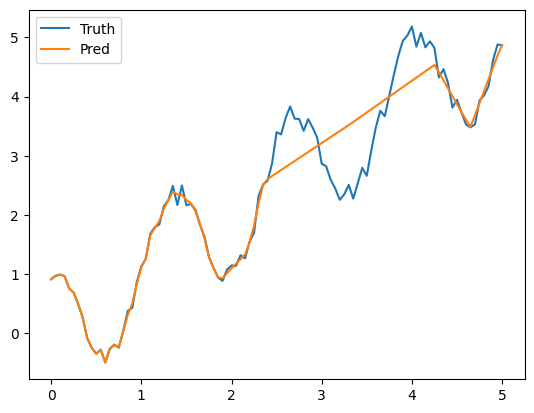

In [8]:
# 학습 후 추론값 확인
inputs = torch.from_numpy(s).float().reshape(-1, 1)
with torch.no_grad():
    pred = model(inputs).detach().numpy()

plt.plot(s, v, label="Truth")
plt.plot(s, pred.reshape(-1), label="Pred")
plt.legend()
plt.show()